# 06 - a - Jupiter - Feasibility Charts - Lift

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Set up the planet and atmosphere model.
planet=Planet("JUPITER")
planet.h_skip = 1000e3
planet.h_low = 50e3
planet.loadAtmosphereModel('../atmdata/Jupiter/jupiter-galileo-asi.dat', 0 , 1 , 2, 3, heightInKmFlag=True)

In [6]:
vinf_kms_array = np.linspace( 0.0,   30.0,  11)
LD_array       = np.linspace( 0.0,    1.0 , 11)

In [4]:
os.makedirs('../data/jsr-paper/jupiter/')

In [4]:
runID = 'jupiter-lift-'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 +\
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array)))

In [5]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-5)
        overShootLimit_array[i,j],  exitflag_os_array[i,j]  = vehicle.findOverShootLimit (2400.0, 1.0, -30.0, -4.0, 1E-10, 430.0e3)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  vehicle.findUnderShootLimit(2400.0, 1.0, -30.0, -4.0, 1E-10, 430.0e3)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+": Arrival V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D:"+str(LD_array[j]) + " OSL: "+str(overShootLimit_array[i,j])+" USL: "+str(underShootLimit_array[i,j])+", TCW: "+str(TCW_array[i,j])+" EFOS: "+str(exitflag_os_array[i,j])+ " EFUS: "+str(exitflag_us_array[i,j]))
        count = count +1

np.savetxt('../data/jsr-paper/jupiter/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'LD_array.txt',LD_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 121: Arrival V_infty: 0.0 km/s, L/D:0.0 OSL: -8.250083343256847 USL: -8.250083343256847, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 121: Arrival V_infty: 0.0 km/s, L/D:0.1 OSL: -8.224272770792595 USL: -8.278023182108882, TCW: 0.05375041131628677 EFOS: 1.0 EFUS: 1.0
Run #3 of 121: Arrival V_infty: 0.0 km/s, L/D:0.2 OSL: -8.200576778501272 USL: -8.308307312334364, TCW: 0.10773053383309161 EFOS: 1.0 EFUS: 1.0
Run #4 of 121: Arrival V_infty: 0.0 km/s, L/D:0.30000000000000004 OSL: -8.178688754262112 USL: -8.340840042365016, TCW: 0.1621512881029048 EFOS: 1.0 EFUS: 1.0
Run #5 of 121: Arrival V_infty: 0.0 km/s, L/D:0.4 OSL: -8.158474835647212 USL: -8.376168460803456, TCW: 0.2176936251562438 EFOS: 1.0 EFUS: 1.0
Run #6 of 121: Arrival V_infty: 0.0 km/s, L/D:0.5 OSL: -8.139820103067905 USL: -8.413846390518302, TCW: 0.2740262874503969 EFOS: 1.0 EFUS: 1.0
Run #7 of 121: Arrival V_infty: 0.0 km/s, L/D:0.6000000000000001 OSL: -8.122652362559165 USL: -8.454718283377588, TCW: 0.33206592081842246 

Run #57 of 121: Arrival V_infty: 15.0 km/s, L/D:0.1 OSL: -8.329697186287376 USL: -8.408140138002636, TCW: 0.07844295171526028 EFOS: 1.0 EFUS: 1.0
Run #58 of 121: Arrival V_infty: 15.0 km/s, L/D:0.2 OSL: -8.296866517426679 USL: -8.454514168202877, TCW: 0.15764765077619813 EFOS: 1.0 EFUS: 1.0
Run #59 of 121: Arrival V_infty: 15.0 km/s, L/D:0.30000000000000004 OSL: -8.267673100235697 USL: -8.505978471628623, TCW: 0.23830537139292574 EFOS: 1.0 EFUS: 1.0
Run #60 of 121: Arrival V_infty: 15.0 km/s, L/D:0.4 OSL: -8.241837993016816 USL: -8.563327188327094, TCW: 0.32148919531027786 EFOS: 1.0 EFUS: 1.0
Run #61 of 121: Arrival V_infty: 15.0 km/s, L/D:0.5 OSL: -8.218944311141968 USL: -8.62544543977856, TCW: 0.4065011286365916 EFOS: 1.0 EFUS: 1.0
Run #62 of 121: Arrival V_infty: 15.0 km/s, L/D:0.6000000000000001 OSL: -8.198455374127661 USL: -8.694075916020665, TCW: 0.495620541893004 EFOS: 1.0 EFUS: 1.0
Run #63 of 121: Arrival V_infty: 15.0 km/s, L/D:0.7000000000000001 OSL: -8.180022807129717 USL: -

Run #113 of 121: Arrival V_infty: 30.0 km/s, L/D:0.2 OSL: -8.483794711784867 USL: -8.771834930390469, TCW: 0.2880402186056017 EFOS: 1.0 EFUS: 1.0
Run #114 of 121: Arrival V_infty: 30.0 km/s, L/D:0.30000000000000004 OSL: -8.441580701910425 USL: -8.885201376499026, TCW: 0.4436206745886011 EFOS: 1.0 EFUS: 1.0
Run #115 of 121: Arrival V_infty: 30.0 km/s, L/D:0.4 OSL: -8.407111298685777 USL: -9.019149668238242, TCW: 0.6120383695524652 EFOS: 1.0 EFUS: 1.0
Run #116 of 121: Arrival V_infty: 30.0 km/s, L/D:0.5 OSL: -8.378377137611096 USL: -9.173707886635384, TCW: 0.7953307490242878 EFOS: 1.0 EFUS: 1.0
Run #117 of 121: Arrival V_infty: 30.0 km/s, L/D:0.6000000000000001 OSL: -8.35435494016565 USL: -9.349420569364156, TCW: 0.9950656291985069 EFOS: 1.0 EFUS: 1.0
Run #118 of 121: Arrival V_infty: 30.0 km/s, L/D:0.7000000000000001 OSL: -8.333632989808393 USL: -9.546438679790299, TCW: 1.2128056899819057 EFOS: 1.0 EFUS: 1.0
Run #119 of 121: Arrival V_infty: 30.0 km/s, L/D:0.8 OSL: -8.315710944378225 US

In [7]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (2400.0, 1.0, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)
        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))


np.savetxt('../data/jsr-paper/jupiter/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/jupiter/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 6.60833313158494 QDOT_MAX: 5595.037845296978 J_MAX: 391576.2268816193 STAG. PRES: 0.12796043643559096
V_infty: 0.0 km/s, L/D: 0.1 G_MAX: 7.043231547625441 QDOT_MAX: 5921.453078299657 J_MAX: 394927.7180599654 STAG. PRES: 0.12047462209065912
V_infty: 0.0 km/s, L/D: 0.2 G_MAX: 7.578275348593165 QDOT_MAX: 6272.25388971557 J_MAX: 398710.8480286293 STAG. PRES: 0.11347295297601283
V_infty: 0.0 km/s, L/D: 0.30000000000000004 G_MAX: 8.219378503290944 QDOT_MAX: 6647.360125514389 J_MAX: 402725.0237254156 STAG. PRES: 0.10678090622853702
V_infty: 0.0 km/s, L/D: 0.4 G_MAX: 8.95633261290585 QDOT_MAX: 7031.9872902046845 J_MAX: 406938.2819528091 STAG. PRES: 0.1004338567295424
V_infty: 0.0 km/s, L/D: 0.5 G_MAX: 9.811249240097762 QDOT_MAX: 7439.535788502653 J_MAX: 411168.1565257269 STAG. PRES: 0.09444491745792809
V_infty: 0.0 km/s, L/D: 0.6000000000000001 G_MAX: 10.807119069839324 QDOT_MAX: 7881.959030853774 J_MAX: 415825.99818081997 STAG. PRES: 0.08889829445663834
V_in

V_infty: 15.0 km/s, L/D: 0.30000000000000004 G_MAX: 13.312499396514253 QDOT_MAX: 12474.851444384292 J_MAX: 585081.4726919101 STAG. PRES: 0.14847905119402144
V_infty: 15.0 km/s, L/D: 0.4 G_MAX: 14.913270489644626 QDOT_MAX: 13813.460513429694 J_MAX: 588872.7807658188 STAG. PRES: 0.13620804526461947
V_infty: 15.0 km/s, L/D: 0.5 G_MAX: 16.760931623711546 QDOT_MAX: 15295.982362551946 J_MAX: 593870.3940665117 STAG. PRES: 0.12503753406866705
V_infty: 15.0 km/s, L/D: 0.6000000000000001 G_MAX: 18.90877066788297 QDOT_MAX: 16940.281314541975 J_MAX: 598757.6579068056 STAG. PRES: 0.11481382225824917
V_infty: 15.0 km/s, L/D: 0.7000000000000001 G_MAX: 21.35591591474936 QDOT_MAX: 18743.612846914642 J_MAX: 604575.1364022498 STAG. PRES: 0.10578611190748091
V_infty: 15.0 km/s, L/D: 0.8 G_MAX: 24.091236302654853 QDOT_MAX: 20699.544704793578 J_MAX: 611067.0009203001 STAG. PRES: 0.09753792234499294
V_infty: 15.0 km/s, L/D: 0.9 G_MAX: 27.169296558487467 QDOT_MAX: 22863.94952819333 J_MAX: 618253.6014553575 ST

V_infty: 30.0 km/s, L/D: 0.6000000000000001 G_MAX: 53.923105629675106 QDOT_MAX: 116088.67473614821 J_MAX: 1301031.5011579597 STAG. PRES: 0.16134710724631943
V_infty: 30.0 km/s, L/D: 0.7000000000000001 G_MAX: 62.4195922697935 QDOT_MAX: 136899.75126370176 J_MAX: 1294811.7928845256 STAG. PRES: 0.14330095194744186
V_infty: 30.0 km/s, L/D: 0.8 G_MAX: 71.58645158748398 QDOT_MAX: 158943.21511057884 J_MAX: 1293790.9850990435 STAG. PRES: 0.12848236628213894
V_infty: 30.0 km/s, L/D: 0.9 G_MAX: 81.70267041343187 QDOT_MAX: 182943.0505166007 J_MAX: 1296564.7582887742 STAG. PRES: 0.11638151338614418
V_infty: 30.0 km/s, L/D: 1.0 G_MAX: 93.05605683401274 QDOT_MAX: 208201.03367199216 J_MAX: 1302315.7329420766 STAG. PRES: 0.10628996228470153


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

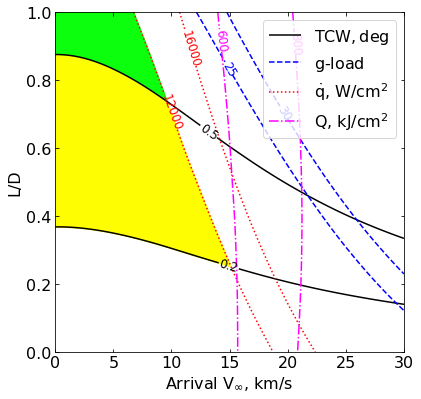

In [10]:
x = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  210)
y_new =  np.linspace( 0.0,   1 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
#S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)


Zlevels = np.array([0.2,0.5])

Glevels = np.array([25.0, 30.0])
Qlevels = np.array([12000, 16000.0])
Hlevels = np.array([600, 800])
#Slevels = np.array([0.8])


plt.figure()
#plt.rcParams["font.family"] = "Times New Roman"
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')

fig = plt.figure()
fig.set_size_inches([6.25,6.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)

QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='magenta',linestyles='dashdot')

plt.clabel(HCS1, inline=1, fontsize=12, colors='magenta',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)
HCS1.collections[1].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')



#SCS1 = plt.contour(X, Y, transpose(S1), levels=Slevels, colors='cyan')

#plt.clabel(SCS1, inline=1, fontsize=12, colors='cyan',fmt='%.1f',inline_spacing=1)
#SCS1.collections[0].set_linewidths(3.0)
#SCS1.collections[0].set_label(r'$Peak$'+r' '+r'$stag. pressure,atm$')

#plt.axhline(y=0.36,linewidth=1, linestyle='dotted' ,color='white',label=r'$Apollo$'+' '+r'$CM$'+' '+r'$L/D$')



#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)


# circles for b=50 plot
#plt.plot(7.5,0.20,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.30,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)

#plt.plot(7.5,0.211,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.315,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)


#plt.grid(True,linestyle='dotted', linewidth=0.1)
params = {'mathtext.default': 'regular' }          
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=16)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.xticks( fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=16)

dat0 = ZCS1.allsegs[1][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = GCS1.allsegs[0][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,101)
y4 = F1(x4)
y4a =F1a(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)
y8 = np.minimum(y4,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')


plt.xlim([0.0,30.0])
plt.ylim([0.0,1])

plt.savefig('../data/jsr-paper/jupiter/jupiter-lift-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/jupiter/jupiter-lift-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/jupiter/jupiter-lift-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


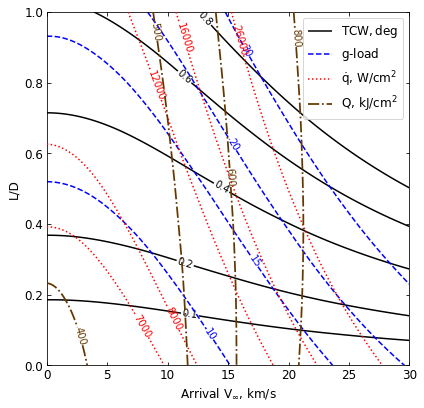

In [11]:
x = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/jupiter/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  310)
y_new =  np.linspace( 0.0,   1.0 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
    #s1_new[i,j] = s1(x_new[i],y_new[j])





Z1 = z1_new

G1 = g1_new

Q1 = q1_new

#S1 = s1_new

H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)
#X, Y = meshgrid(x, y)


Zlevels = np.array([0.1, 0.2,0.4,0.6,0.8])

Glevels = np.array([10.0, 15.0, 20.0, 30.0])
Qlevels = np.array([7000.0, 8000.0, 12000.0, 16000.0, 26000.0])
Hlevels = np.array([350.0, 400.0, 500.0, 600.0, 800.0])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black',zorder=0)




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1,zorder=0)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)
ZCS1.collections[4].set_linewidths(1.5)



ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed',zorder=1)

plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0,zorder=1)



GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[3].set_linewidths(1.5)


GCS1.collections[0].set_label(r'$g$'+r'-load')


QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted',zorder=13)

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0,zorder=13)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[4].set_linewidths(1.5)


QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot',zorder=14)

plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0,zorder=14)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)
HCS1.collections[4].set_linewidths(1.75)



HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=12)


plt.savefig('../data/jsr-paper/jupiter/jupiter-lift-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/jupiter/jupiter-lift-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/jupiter/jupiter-lift-large.eps', dpi=300,bbox_inches='tight')